In [1]:
#2 thư viện của thầy hết, chưa biết dùng đâu
import os
import matplotlib.pyplot as plt
from queue import PriorityQueue
import math

In [2]:
#Chưa chỉnh gì cả

def visualize_maze(matrix, bonus, start, end, route=None, path = None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']

    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=100).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')



    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')

    plt.xticks([])
    plt.yticks([])

    
    if path: 
        for i in range(len(path)-2):
            plt.scatter(path[i+1][1],-path[i+1][0],
                        color='plum')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='blue', s = 100)


    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
      print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')

In [3]:
#Đọc maze vô mảng 2 chiều
def read_file(file_name):
    f=open(file_name,'r')
    n = int(f.readline())
    bonus_points = []
    for i in range(n):
        x, y, reward = f.readline().strip().split(' ')
        bonus_points.append((x, y, reward))
    matrix = []
    for line in f.read().splitlines():
        matrix.append(list(line))
    f.close()

    return bonus_points, matrix

In [4]:
#Xác định điểm S và E của maze
def start_end_point(matrix):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 'S':
                start = (i,j)
            elif i == 0 or j == 0 or i == len(maze) - 1 or j == len(maze[0]) - 1:
                if maze[i][j]==' ':
                    end = (i,j)
    return start, end

In [5]:
#khu de quy
def DFS(matrix, start, end):
    route = []
    travel = []
    if start == end:
        route.append(start)
        travel.append(start)
        return route, travel
    
    stack_frontier = []
    list_explore = []
    dfspath = {}
    stack_frontier.append(start)
    while len(stack_frontier) != 0:
        cur_point = stack_frontier.pop()
        travel.append(cur_point)
        if cur_point == end:
            break        
        neighbour = [(cur_point[0]-1,cur_point[1]),(cur_point[0]+1,cur_point[1]),(cur_point[0],cur_point[1]-1),(cur_point[0],cur_point[1]+1)]
        for point_next in neighbour:
            if point_next not in list_explore:
                if matrix[point_next[0]][point_next[1]] == ' ':
                    stack_frontier.append(point_next)
                    list_explore.append(point_next)
                    dfspath[point_next] = cur_point
    cur_point = end
    route.append(end)
    while cur_point != start:
        route.append(dfspath[cur_point])
        cur_point = dfspath[cur_point]
    route.reverse()
    return route, travel

In [6]:
def BFS(maze, start, end):
    route = []
    frontier = [start]
    visited = [start]
    bfsPath = {}
    travel_path = []
    while len(frontier) > 0:
        curPos = frontier.pop(0)
        travel_path.append(curPos)
        if curPos == end:
            break
        directions = [(curPos[0]-1,curPos[1]),(curPos[0]+1,curPos[1]),(curPos[0],curPos[1]-1),(curPos[0],curPos[1]+1)]
        for nextPos in directions:
            if nextPos not in visited:
                if maze[nextPos[0]][nextPos[1]] == ' ':
                    frontier.append(nextPos)
                    visited.append(nextPos)
                    bfsPath[nextPos] = curPos
            else:
                continue
    
    cur_point = end
    route.append(end)
    while cur_point != start:
        route.append(bfsPath[cur_point])
        cur_point = bfsPath[cur_point]
    route.reverse()
    return route, travel_path

In [7]:
def manhattan_heu_cost(pos1,pos2):
    x1,y1 = pos1
    x2,y2 = pos2
    return abs(x1-x2) + abs(y1-y2)

In [8]:
def euclid_heu_cost(pos1,pos2):
    x1,y1 = pos1
    x2,y2 = pos2
    return math.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

In [9]:
def heu_cost(pos1, pos2, chon):
    if chon == 1:
        return manhattan_heu_cost(pos1, pos2)
    else:
        return euclid_heu_cost(pos1, pos2)

In [10]:
def Greedy(maze, start, end, heu):
    route = []
    if start == end:
        route.append(start)
        return route
    list_close = []
    list_close.append(start)   
    list_open = []
    list_heu_open = []
    heu_matrix= []
    path = {}
    travel = []
    for i in range(len(maze)):
        row_dis = []
        for j in range(len(maze[0])):
            pos = (i, j)
            row_dis.append(heu_cost(pos, end, heu))
            
        heu_matrix.append(row_dis)
    cur_point = start
    while cur_point != end:
        travel.append(cur_point)
        neighbour = [(cur_point[0]-1,cur_point[1]),(cur_point[0]+1,cur_point[1]),(cur_point[0],cur_point[1]-1),(cur_point[0],cur_point[1]+1)]
        for point_next in neighbour:
            if point_next not in list_close and point_next not in list_open:
                if maze[point_next[0]][point_next[1]] == ' ':
                    list_open.append(point_next)
                    list_heu_open.append(heu_matrix[point_next[0]][point_next[1]])
                    path[point_next] = cur_point
        min_heu = min(list_heu_open)
        index_next = list_heu_open.index(min_heu)
        list_heu_open.pop(index_next)
        cur_point = list_open.pop(index_next)
        list_close.append(cur_point)
    cur_point = end
    route.append(end)
    while cur_point != start:
        route.append(path[cur_point])
        cur_point = path[cur_point]
    route.reverse()
    return route, travel

In [11]:
def AStar(maze, start, end, heu):
    route = []
    path = []
    aPath = {}

    ways = [(i,j) for i in range(len(maze)) for j in range(len(maze[0])) if maze[i][j]== ' ']
    g_score = {pos:float('inf') for pos in ways}
    g_score[start] = 0
    f_score = {pos:float('inf') for pos in ways}
    f_score[start] = heu_cost(start,end, heu)
    
    frontier = PriorityQueue()
    frontier.put((heu_cost(start,end, heu), heu_cost(start,end, heu),start))
    
    while not frontier.empty():
        curPos = frontier.get()[2]
        path.append(curPos)
        if curPos == end:
            break
        directions = [(curPos[0]-1,curPos[1]),(curPos[0]+1,curPos[1]),(curPos[0],curPos[1]-1),(curPos[0],curPos[1]+1)]
        for nextPos in directions:
            if maze[nextPos[0]][nextPos[1]] == ' ':
                tmp_g_score = g_score[curPos] + 1
                tmp_f_score = tmp_g_score + heu_cost(nextPos,end, heu)
                if tmp_f_score < f_score[nextPos]:
                    g_score[nextPos] = tmp_g_score
                    f_score[nextPos] = tmp_f_score
                    frontier.put((tmp_f_score,heu_cost(nextPos,end, heu),nextPos))
                    aPath[nextPos] = curPos
    cur_point = end
    route.append(end)
    while cur_point != start:
        route.append(aPath[cur_point])
        cur_point = aPath[cur_point]
    route.reverse()
    return route, path

In [90]:
diem, maze = read_file("non_bonus/maze8.txt")
start, end = start_end_point(maze)
route = []
travel = []
route, travel = DFS(maze, start, end)
print(route)

[(15, 13), (15, 14), (15, 15), (15, 16), (14, 16), (14, 17), (14, 18), (14, 19), (14, 20), (14, 21), (14, 22), (14, 23), (13, 23), (13, 24), (13, 25), (14, 25), (15, 25), (15, 26), (16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (16, 31), (16, 32), (16, 33), (16, 34), (16, 35), (16, 36), (16, 37), (16, 38), (15, 38), (15, 39), (15, 40), (15, 41), (15, 42), (14, 42), (13, 42), (13, 41), (13, 40), (13, 39), (13, 38), (13, 37), (12, 37), (12, 36), (12, 35), (12, 34), (13, 34), (14, 34), (14, 33), (14, 32), (14, 31), (13, 31), (12, 31), (12, 30), (11, 30), (11, 29), (10, 29), (10, 28), (10, 27), (9, 27), (9, 26), (8, 26), (8, 25), (7, 25), (7, 24), (7, 23), (8, 23), (8, 22), (8, 21), (9, 21), (10, 21), (10, 22), (11, 22), (12, 22), (12, 21), (12, 20), (11, 20), (11, 19), (11, 18), (12, 18), (12, 17), (12, 16), (12, 15), (12, 14), (12, 13), (12, 12), (13, 12), (13, 11), (13, 10), (13, 9), (13, 8), (13, 7), (13, 6), (13, 5), (13, 4), (14, 4), (14, 3), (14, 2), (14, 1), (13, 1), (12, 1), (1

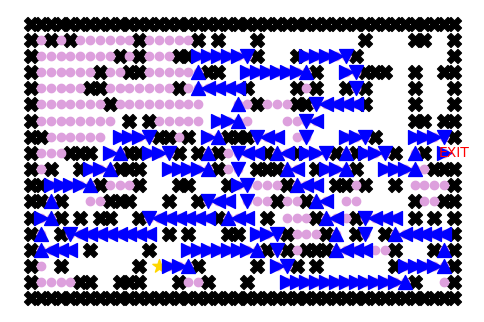

Starting point (x, y) = (15, 13)
Ending point (x, y) = (8, 43)


In [91]:
visualize_maze(maze, diem, start, end, route, travel)

In [80]:
diem, maze = read_file("non_bonus/maze7.txt")
start, end = start_end_point(maze)
route = []
travel_path= []
route, travel_path = BFS(maze, start, end)
print(route)

[(7, 18), (6, 18), (6, 19), (5, 19), (4, 19), (4, 20), (3, 20), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29)]


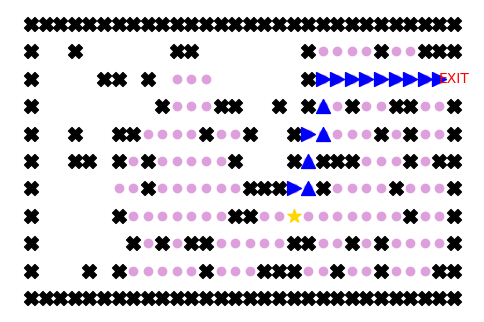

Starting point (x, y) = (7, 18)
Ending point (x, y) = (2, 29)


In [81]:
visualize_maze(maze, diem, start, end, route, travel_path)

In [82]:
#greedy manhattan
diem, maze = read_file("non_bonus/maze7.txt")
start, end = start_end_point(maze)
route = []
travel = []
route, travel = Greedy(maze, start, end, 1)
print(route)

[(7, 18), (6, 18), (6, 19), (5, 19), (4, 19), (4, 20), (3, 20), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29)]


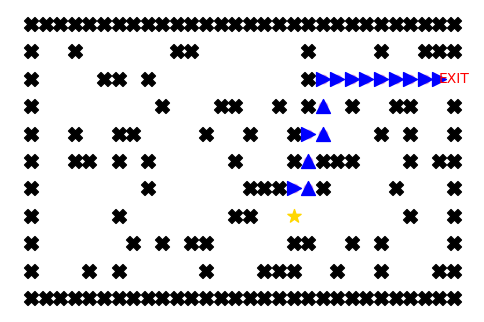

Starting point (x, y) = (7, 18)
Ending point (x, y) = (2, 29)


In [83]:
visualize_maze(maze, diem, start, end, route, travel)

In [84]:
#greedy euclid
diem, maze = read_file("non_bonus/maze7.txt")
start, end = start_end_point(maze)
route = []
travel = []
route, travel = Greedy(maze, start, end, 2)
print(route)

[(7, 18), (7, 19), (7, 20), (7, 21), (7, 22), (7, 23), (7, 24), (6, 24), (5, 24), (5, 23), (4, 23), (3, 23), (3, 24), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29)]


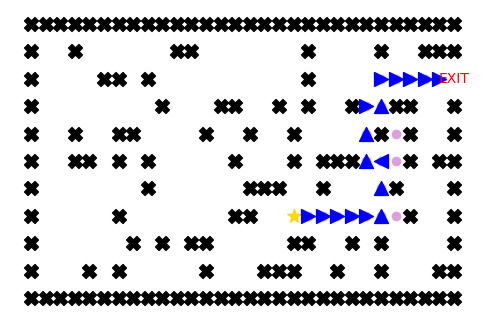

Starting point (x, y) = (7, 18)
Ending point (x, y) = (2, 29)


In [85]:
visualize_maze(maze, diem, start, end, route, travel)

In [86]:
#A* manhattan
diem, maze = read_file("non_bonus/maze7.txt")
start, end = start_end_point(maze)
route = []
travel_path= []
route, travel_path = AStar(maze, start, end, 1)
print(route)

[(7, 18), (6, 18), (6, 19), (5, 19), (4, 19), (4, 20), (3, 20), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29)]


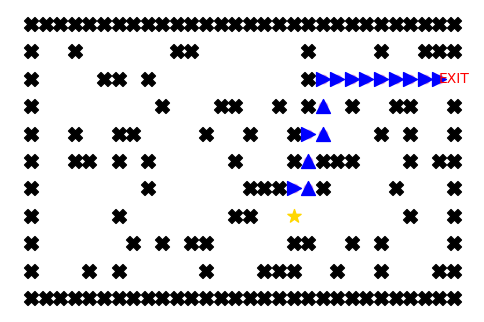

Starting point (x, y) = (7, 18)
Ending point (x, y) = (2, 29)


In [87]:
visualize_maze(maze, diem, start, end, route, travel_path)

In [88]:
#A* euclid
diem, maze = read_file("non_bonus/maze7.txt")
start, end = start_end_point(maze)
route = []
travel_path= []
route, travel_path = AStar(maze, start, end, 2)
print(route)

[(7, 18), (7, 19), (7, 20), (7, 21), (7, 22), (7, 23), (6, 23), (5, 23), (4, 23), (3, 23), (3, 24), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29)]


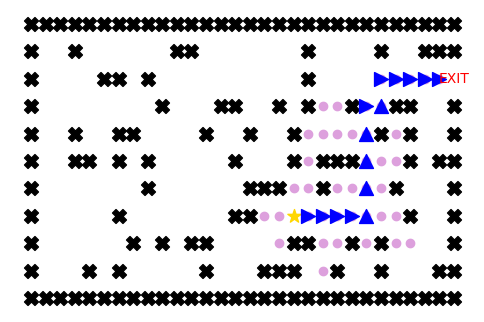

Starting point (x, y) = (7, 18)
Ending point (x, y) = (2, 29)


In [89]:
visualize_maze(maze, diem, start, end, route, travel_path)